T1 : Data Retrival
---
The Data is retrived from yahoo finance.


*   Start Date : 2016:01:10
*   End Date : Present



---


It includes:


1.   Stocks
2.   Precious Metals
3.   Etf
4.   Cryptocurrency

In [51]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as dr
import yfinance as yf
yf.pdr_override()


start_date = "2016-05-10"
end_date = dt.date.today()
sym = ['GOOGL','AAPL','AMZN','TSLA','MSFT','BTC-USD','SI=F','GC=F','BFIT','INTC','DIS','PFE']
data = dr.get_data_yahoo(sym,start=start_date, end=end_date)['Close']
data=data.dropna()
print(data)

[*********************100%%**********************]  12 of 12 completed
                  AAPL        AMZN       BFIT       BTC-USD         DIS  \
Date                                                                      
2016-05-10   23.355000   35.153500  15.280000    450.894989  106.599998   
2016-05-11   23.127501   35.661499  15.160000    452.727997  102.290001   
2016-05-12   22.584999   35.896500  15.160000    454.765991  101.709999   
2016-05-13   22.629999   35.495998  15.160000    455.670013  100.519997   
2016-05-16   23.469999   35.533001  14.870000    454.162994  100.360001   
...                ...         ...        ...           ...         ...   
2023-10-30  170.289993  132.710007  20.385000  34502.363281   80.680000   
2023-10-31  170.770004  133.089996  20.299999  34667.781250   81.589996   
2023-11-01  173.970001  137.000000  20.330000  35437.253906   81.070000   
2023-11-02  177.570007  138.070007  20.870001  34938.242188   83.290001   
2023-11-03  176.649994  138.6

#Plotting the stock price closing data over the selected time period.

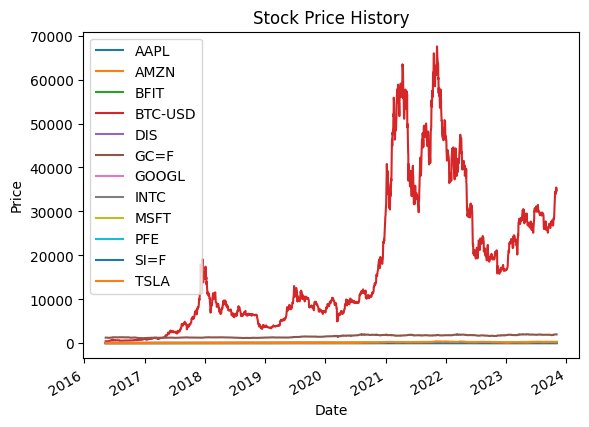

In [52]:
close = data
a=close.plot(xlabel='Date', ylabel='Price',title='Stock Price History')
plt.show()

#Get Mean Returns and Plot % Change in Returns.




,Mean Returns,Standard Deviation
AAPL,31.481494,0.018635
AMZN,23.805408,0.020779
BFIT,6.636170,0.012780
BTC-USD,84.198362,0.045278
DIS,1.175299,0.018275
GC=F,7.182407,0.009073
GOOGL,20.892733,0.018122
INTC,9.216384,0.021887
MSFT,29.811518,0.017613
PFE,2.463306,0.014943


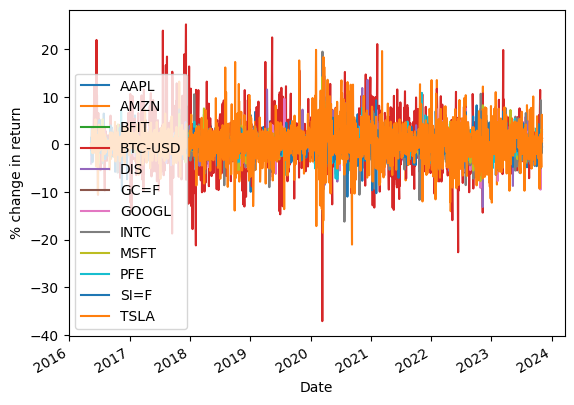

In [53]:
returns=close.pct_change()
p=(returns*100).plot(ylabel='% change in return')
pd.DataFrame({'Mean Returns':returns.mean()*252*100,'Standard Deviation':returns.std()})


#Calculating and Plotting Volatility

<Axes: xlabel='Date', ylabel='Rolling annual Std. Deviation'>

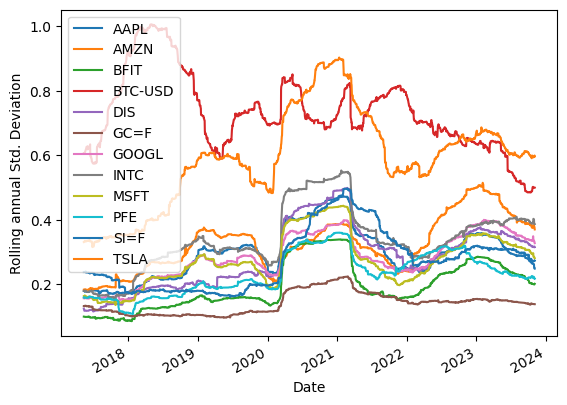

In [75]:
Ret = close / close.shift(1)

vol = Ret.rolling(window=252).std() * np.sqrt(252)

vol.plot(ylabel='Rolling annual Std. Deviation')

#Calculating and Plotting Drawdown.

<Axes: xlabel='Date', ylabel='Max. Drawdown %'>

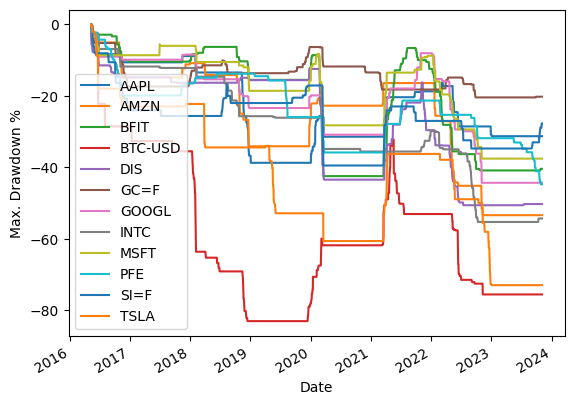

In [76]:
RolMax = data.rolling(252, min_periods=1).max()
drawdown = data/RolMax - 1.0

Max_Drawdown = drawdown.rolling(252, min_periods=1).min()*100

Max_Drawdown.plot(ylabel='Max. Drawdown %')

#Selecting the number of simulations and intializing arrays for saving the output information.

In [56]:
num_of_simulations=30000
num_of_symbols=len(sym)
weights_arr=np.zeros((num_of_simulations,num_of_symbols))
returns_arr=np.zeros(num_of_simulations)
volatilities=np.zeros(num_of_simulations)
sharpe_ratios=np.zeros(num_of_simulations)

## Running Monte Carlo Simulations

In [57]:
for i in range(num_of_simulations):
  weights=np.array(np.random.random(num_of_symbols))
  weights=weights/np.sum(weights)
  weights_arr[i]=weights
  returns_arr[i]=np.sum(returns.mean()*252*weights)
  volatilities[i]=np.sqrt(np.dot(weights.T,np.dot(252*returns.cov(),weights)))
  sharpe_ratios[i]=(returns_arr[i]-0.0486)/volatilities_arr[i]

## Collecting output of the monte carlo simulation in a dataframe.

In [58]:
collective_data=[returns_arr,volatilities,sharpe_ratios,weights_arr]
collective_df=pd.DataFrame(collective_data).T
collective_df.columns=['Returns','Volatility','Sharpe','Weights']
collective_df=collective_df.infer_objects()
collective_df


,Returns,Volatility,Sharpe,Weights
0,0.234005,0.210855,0.879301,"[0.041494421507172155, 0.08104417029689497, 0...."
1,0.266264,0.216314,1.006238,"[0.02189751544364439, 0.18638824702565726, 0.0..."
2,0.215841,0.208867,0.800706,"[0.07524205947892285, 0.0330259400587583, 0.14..."
3,0.152229,0.184326,0.562205,"[0.10512578166177257, 0.04841822813029013, 0.1..."
4,0.250720,0.206262,0.979920,"[0.10055020394898706, 0.03995588936765395, 0.0..."
...,...,...,...,...
29995,0.240187,0.208809,0.917519,"[0.08776438577070167, 0.12099442087813572, 0.1..."
29996,0.299989,0.224754,1.118507,"[0.08253399989925822, 0.022338875477879057, 0...."
29997,0.190060,0.197100,0.717707,"[0.09825509317202334, 0.06717907391346588, 0.0..."
29998,0.184998,0.183650,0.742702,"[0.11903103721325972, 0.015973698500335268, 0...."


#Printing the Monte Carlo Simulation.

In [77]:
msr=collective_df.loc[collective_df['Sharpe'].idxmax()]
print("MAX SHARPE RATIO")
print(msr)
print(msr['Weights'])
mv=collective_df.loc[collective_df['Volatility'].idxmin()]
print("MIN VOLATILITY")
print(mv)
print(mv['Weights'])
mav=collective_df.loc[collective_df['Volatility'].idxmax()]
print("MAX VOLATILITY")
print(mav)
print(mav['Weights'])
print("MAX RETURNS")
mr=collective_df.loc[collective_df['Returns'].idxmax()]
print(mr)
print(mr['Weights'])

MAX SHARPE RATIO
Returns                                                0.388123
Volatility                                             0.269289
Sharpe                                                 1.260813
Weights       [0.06332784732724586, 0.0003763929874532004, 0...
Name: 24433, dtype: object
[0.06332785 0.00037639 0.0024132  0.21971819 0.0044747  0.09236065
 0.00490639 0.01564991 0.16287387 0.18086193 0.03639286 0.21664406]
MIN VOLATILITY
Returns                                                0.113236
Volatility                                              0.14998
Sharpe                                                 0.430967
Weights       [0.03015236790062931, 0.009248246199215764, 0....
Name: 10609, dtype: object
[0.03015237 0.00924825 0.17033818 0.02356338 0.08907727 0.1710711
 0.0445147  0.05474221 0.03751385 0.18602218 0.15832464 0.02543186]
MAX VOLATILITY
Returns                                                0.424637
Volatility                                            

# Plotting the Monte Carlo Simulation.

Text(0, 0.5, 'Returns')

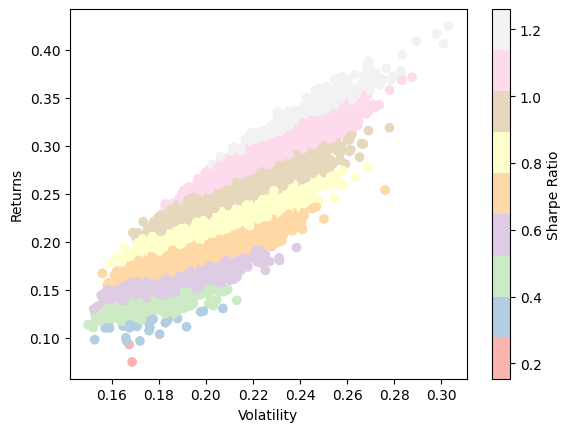

In [60]:
%matplotlib inline
plt.scatter(y=collective_df['Returns'] ,x=collective_df['Volatility'],c=collective_df['Sharpe'],cmap='Pastel1')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel("Volatility")
plt.ylabel("Returns")

## Optimization using mean-variance algorithm

In [61]:
from scipy.optimize import linprog
from scipy import optimize

# Linear Function to get weights for maximum return.

In [62]:
def MaximizeReturns(MeanReturns, PortfolioSize):

    x1 = (np.multiply(-1,MeanReturns))
    x2 = np.ones([PortfolioSize,1]).T
    x3=[1]
    res = linprog(x1, A_ub = x2, b_ub = x3, bounds = (0,1), method = 'highs')

    return result

Calculating maximum return.

In [63]:
res=MaximizeReturns(close.pct_change().mean(),num_of_symbols)
result2=np.sum(res.x*close.pct_change().mean())

# Function to calculate weights corresponding to minimum risk.

In [65]:
def MinimizeRisk(CovarReturns, PortfolioSize):

    def  fun1(x, CovarReturns):
        func = np.matmul(np.matmul(x, CovarReturns), x.T)
        return func

    def constEq(x):
        x1=np.ones(x.shape)
        x2=1
        constval = np.matmul(x1,x.T)-x2
        return constval

    xin=np.repeat(0.1, PortfolioSize)
    consts = ({'type': 'eq', 'fun':constEq})
    bounds = tuple([(0,1) for x in xin])

    optim = optimize.minimize (fun1, x0 = xin, args = (CovarReturns),  bounds = bounds, \
                             constraints = consts, tol = 10**-3)
    return optim

Calculating return corresponding to minimum risk.

In [66]:
ris_res=MinimizeRisk(close.pct_change().cov(),num_of_symbols)
result1=np.sum(close.pct_change().mean().T*ris_res.x)
result1*252

0.23246382623799508

# Optimization function that calculate weight distribution for series of return values between result1 and result2 with minimum amount of risk for that value.

In [67]:
def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):

    def  fun1(x,CovarReturns):

        func = np.matmul(np.matmul(x,CovarReturns ), x.T)
        return func

    def Eq(x):
        x1=np.ones(x.shape)
        x2=1
        Val = np.matmul(x1,x.T)-x2
        return Val

    def Ineq(x, mean_returns, R):
        AIneq = np.array(mean_returns)
        bIneq = R
        ineq_val = np.matmul(AIneq,x.T) - bIneq
        return ineq_val


    xin=np.repeat(0.1, PortfolioSize)
    const = ({'type': 'eq', 'fun':Eq},
            {'type':'ineq', 'fun':Ineq, 'args':(MeanReturns,R) })
    bounds = tuple([(0,1) for x in xin])

    opt = optimize.minimize (fun1, args = (CovarReturns), method ='trust-constr',  \
                        x0 = xin,   bounds = bounds, constraints = const, tol = 10**-3)

    return  opt

In [72]:
increment = 0.0001
low=result1
high=result2
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]


In [ ]:
while (low < high):
    result3 = MinimizeRiskConstr(close.pct_change().mean(), close.pct_change().cov(),num_of_symbols, low)
    xOptimal.append(result3.x)
    expPortfolioReturnPoint.append(low)
    low = low+increment

Size of the efficient set: (25, 12)


,Risk,Return,AAPL,AMZN,BFIT,BTC-USD,DIS,GC=F,GOOGL,INTC,MSFT,PFE,SI=F,TSLA
0,0.206724,0.232464,0.085106,0.082870,0.079899,0.098042,0.077975,0.081366,0.082364,0.079243,0.084696,0.079393,0.080742,0.089038
1,0.206755,0.257664,0.085118,0.082877,0.079900,0.098081,0.077972,0.081371,0.082370,0.079243,0.084707,0.079393,0.080745,0.089057
2,0.206786,0.282864,0.085129,0.082884,0.079901,0.098120,0.077969,0.081375,0.082376,0.079243,0.084718,0.079393,0.080748,0.089077
3,0.214470,0.308064,0.086220,0.082103,0.075484,0.117821,0.072695,0.076901,0.080935,0.075465,0.085386,0.074189,0.076610,0.096650
4,0.214515,0.333264,0.086231,0.082106,0.075475,0.117900,0.072680,0.076895,0.080936,0.075456,0.085396,0.074177,0.076602,0.096683
5,0.214559,0.358464,0.086243,0.082109,0.075466,0.117980,0.072666,0.076888,0.080936,0.075446,0.085405,0.074166,0.076595,0.096715
6,0.214604,0.383664,0.086254,0.082112,0.075456,0.118060,0.072651,0.076882,0.080937,0.075436,0.085415,0.074154,0.076588,0.096748
7,0.214648,0.408864,0.086265,0.082115,0.075447,0.118140,0.072637,0.076875,0.080938,0.075427,0.085425,0.074142,0.076581,0.096780
8,0.214693,0.434064,0.086277,0.082118,0.075437,0.118219,0.072622,0.076869,0.080939,0.075417,0.085434,0.074131,0.076573,0.096812
9,0.214838,0.459264,0.086313,0.082090,0.075368,0.118607,0.072496,0.076868,0.080903,0.075306,0.085460,0.074063,0.076526,0.096924


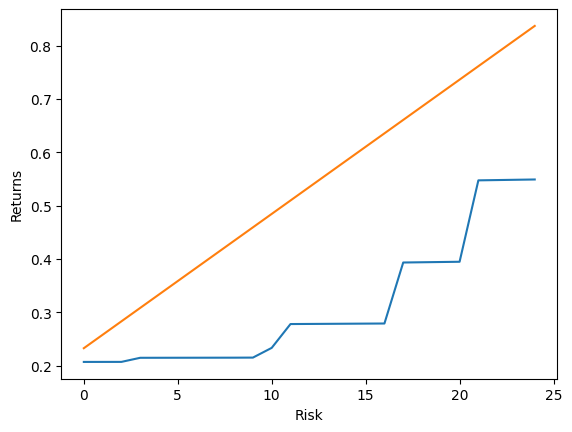

In [74]:
xOptimalArray=np.array(xOptimal)
minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,close.pct_change().cov())),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint*252)
retPoint = 252*np.array(expPortfolioReturnPoint)
print("Size of the efficient set:", xOptimalArray.shape )
p=pd.DataFrame({'Risk':riskPoint,'Return':retPoint})
plt.plot(p)
plt.xlabel("Risk")
plt.ylabel("Returns")
p[['AAPL','AMZN','BFIT','BTC-USD','DIS','GC=F','GOOGL','INTC','MSFT','PFE','SI=F','TSLA']]=xOptimalArray
p
